In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train_data = pd.read_csv("Dataset/train.csv")

In [18]:
train_data.head(10)

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1
1,ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2
2,ANSL_69750,2014-09-28 00:00:00,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4
3,ANSL_71623,2016-12-31 00:00:00,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2
4,ANSL_57969,2017-09-28 00:00:00,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1
5,ANSL_52200,2017-10-25 00:00:00,2019-03-10 13:18:00,0.0,Red,0.92,29.56,0,7,1.0,2
6,ANSL_75444,2018-11-06 00:00:00,2019-04-09 16:00:00,2.0,Brown Tabby,0.14,40.24,0,1,0.0,1
7,ANSL_52759,2018-06-05 00:00:00,2018-09-02 17:04:00,0.0,White,0.15,25.48,7,1,1.0,1
8,ANSL_74632,2015-10-10 00:00:00,2016-08-04 16:29:00,2.0,Brown,0.05,38.22,13,9,1.0,2
9,ANSL_56464,2014-02-18 00:00:00,2017-03-17 11:38:00,2.0,Brown,0.55,21.26,13,9,1.0,2


In [5]:
train_data.pet_category.unique()

array([1, 2, 4, 0], dtype=int64)

In [21]:
train_data.color_type.unique().shape

(56,)

In [24]:
train_data.isnull().any()

pet_id            False
issue_date        False
listing_date      False
condition          True
color_type        False
length(m)         False
height(cm)        False
X1                False
X2                False
breed_category    False
pet_category      False
dtype: bool

In [25]:
train_data.condition.nunique()

3

In [27]:
train_data.condition.isnull().count()

18834

In [33]:
pd.to_datetime(train_data.listing_date)-pd.to_datetime(train_data.issue_date)

0         73 days 16:25:00
1       1862 days 17:47:00
2        752 days 08:24:00
3        755 days 18:30:00
4         52 days 09:38:00
               ...        
18829    407 days 15:35:00
18830    386 days 08:37:00
18831   2954 days 14:27:00
18832    272 days 14:05:00
18833   2509 days 14:18:00
Length: 18834, dtype: timedelta64[ns]

In [36]:
train_data.listing_date = pd.to_datetime(train_data.listing_date)

In [37]:
train_data.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,ANSL_69903,2016-07-10,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1
1,ANSL_66892,2013-11-21,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2
2,ANSL_69750,2014-09-28,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4
3,ANSL_71623,2016-12-31,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2
4,ANSL_57969,2017-09-28,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1


In [39]:
train_data.diff_in_date=

c:\users\thepyguy\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [41]:
train_data['diff_in_date'] = train_data.listing_date-train_data.issue_date

In [42]:
train_data.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category,diff_in_date
0,ANSL_69903,2016-07-10,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1,73 days 16:25:00
1,ANSL_66892,2013-11-21,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2,1862 days 17:47:00
2,ANSL_69750,2014-09-28,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4,752 days 08:24:00
3,ANSL_71623,2016-12-31,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2,755 days 18:30:00
4,ANSL_57969,2017-09-28,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1,52 days 09:38:00


In [43]:
type(train_data.diff_in_date)

pandas.core.series.Series

In [45]:
train_data.dtypes

pet_id                     object
issue_date         datetime64[ns]
listing_date       datetime64[ns]
condition                 float64
color_type                 object
length(m)                 float64
height(cm)                float64
X1                          int64
X2                          int64
breed_category            float64
pet_category                int64
diff_in_date      timedelta64[ns]
dtype: object

In [47]:
test_data=pd.read_csv("Dataset/test.csv")

In [48]:
test_data.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2
0,ANSL_75005,2005-08-17 00:00:00,2017-09-07 15:35:00,0.0,Black,0.87,42.73,0,7
1,ANSL_76663,2018-11-15 00:00:00,2019-05-08 17:24:00,1.0,Orange Tabby,0.06,6.71,0,1
2,ANSL_58259,2012-10-11 00:00:00,2018-04-02 16:51:00,1.0,Black,0.24,41.21,0,7
3,ANSL_67171,2015-02-13 00:00:00,2018-04-06 07:25:00,1.0,Black,0.29,8.46,7,1
4,ANSL_72871,2017-01-18 00:00:00,2018-04-26 13:42:00,1.0,Brown,0.71,30.92,0,7


In [51]:
train_data.breed_category.unique()

array([0., 2., 1.])

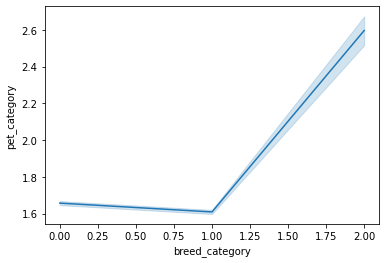

In [53]:
sn.lineplot(train_data.breed_category, train_data.pet_category)

In [59]:
count = {}
p_unique = [x for x in train_data.pet_category.unique()]
for x in p_unique:
    count[x] = len(train_data.loc[train_data.pet_category==x].pet_category)

In [60]:
count

{1: 7184, 2: 10621, 4: 941, 0: 88}

In [68]:
x=[]
y=[]
for k,v in count.items():
    x.append(k)
    y.append(v)

In [69]:
x

[1, 2, 4, 0]

In [70]:
y

[7184, 10621, 941, 88]

<BarContainer object of 4 artists>

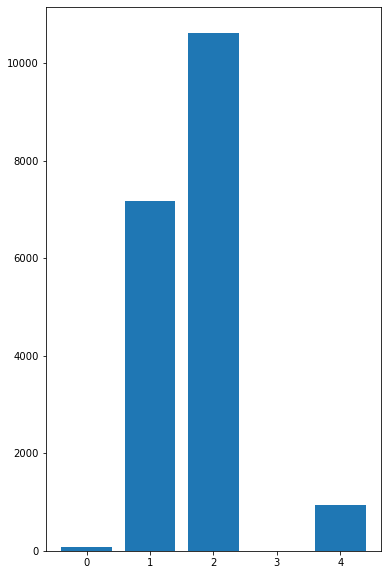

In [76]:
plt.figure(figsize=(6,10))
plt.bar(x,y)

In [79]:
train_data.breed_category.unique()

array([0., 2., 1.])

In [80]:
train_data.pet_category.unique()

array([1, 2, 4, 0], dtype=int64)

In [81]:
from sklearn.model_slection import train_test_split

ModuleNotFoundError: No module named 'sklearn.model_slection'

In [82]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, KFold

In [83]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

In [84]:
train_data.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category,diff_in_date
0,ANSL_69903,2016-07-10,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1,73 days 16:25:00
1,ANSL_66892,2013-11-21,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2,1862 days 17:47:00
2,ANSL_69750,2014-09-28,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4,752 days 08:24:00
3,ANSL_71623,2016-12-31,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2,755 days 18:30:00
4,ANSL_57969,2017-09-28,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1,52 days 09:38:00


In [87]:
encoder = LabelEncoder()
encoded = encoder.fit_transform(train_data.color_type)

In [88]:
encoded.shape

(18834,)

In [89]:
train_data['color_type_encoded'] = encoded

In [90]:
train_data.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category,diff_in_date,color_type_encoded
0,ANSL_69903,2016-07-10,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1,73 days 16:25:00,18
1,ANSL_66892,2013-11-21,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2,1862 days 17:47:00,53
2,ANSL_69750,2014-09-28,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4,752 days 08:24:00,15
3,ANSL_71623,2016-12-31,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2,755 days 18:30:00,53
4,ANSL_57969,2017-09-28,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1,52 days 09:38:00,2


In [91]:
train_data.color_type.nunique()

56

In [92]:
test_data['color_type_encoded'] = encoder.transform(test_data.color_type)

In [93]:
test_data.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,color_type_encoded
0,ANSL_75005,2005-08-17 00:00:00,2017-09-07 15:35:00,0.0,Black,0.87,42.73,0,7,2
1,ANSL_76663,2018-11-15 00:00:00,2019-05-08 17:24:00,1.0,Orange Tabby,0.06,6.71,0,1,38
2,ANSL_58259,2012-10-11 00:00:00,2018-04-02 16:51:00,1.0,Black,0.24,41.21,0,7,2
3,ANSL_67171,2015-02-13 00:00:00,2018-04-06 07:25:00,1.0,Black,0.29,8.46,7,1,2
4,ANSL_72871,2017-01-18 00:00:00,2018-04-26 13:42:00,1.0,Brown,0.71,30.92,0,7,15


In [95]:
train_data.head(25)

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category,diff_in_date,color_type_encoded
0,ANSL_69903,2016-07-10,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1,73 days 16:25:00,18
1,ANSL_66892,2013-11-21,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2,1862 days 17:47:00,53
2,ANSL_69750,2014-09-28,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4,752 days 08:24:00,15
3,ANSL_71623,2016-12-31,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2,755 days 18:30:00,53
4,ANSL_57969,2017-09-28,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1,52 days 09:38:00,2
5,ANSL_52200,2017-10-25,2019-03-10 13:18:00,0.0,Red,0.92,29.56,0,7,1.0,2,501 days 13:18:00,40
6,ANSL_75444,2018-11-06,2019-04-09 16:00:00,2.0,Brown Tabby,0.14,40.24,0,1,0.0,1,154 days 16:00:00,18
7,ANSL_52759,2018-06-05,2018-09-02 17:04:00,0.0,White,0.15,25.48,7,1,1.0,1,89 days 17:04:00,53
8,ANSL_74632,2015-10-10,2016-08-04 16:29:00,2.0,Brown,0.05,38.22,13,9,1.0,2,299 days 16:29:00,15
9,ANSL_56464,2014-02-18,2017-03-17 11:38:00,2.0,Brown,0.55,21.26,13,9,1.0,2,1123 days 11:38:00,15


In [97]:
test_data.head(25)

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,color_type_encoded
0,ANSL_75005,2005-08-17 00:00:00,2017-09-07 15:35:00,0.0,Black,0.87,42.73,0,7,2
1,ANSL_76663,2018-11-15 00:00:00,2019-05-08 17:24:00,1.0,Orange Tabby,0.06,6.71,0,1,38
2,ANSL_58259,2012-10-11 00:00:00,2018-04-02 16:51:00,1.0,Black,0.24,41.21,0,7,2
3,ANSL_67171,2015-02-13 00:00:00,2018-04-06 07:25:00,1.0,Black,0.29,8.46,7,1,2
4,ANSL_72871,2017-01-18 00:00:00,2018-04-26 13:42:00,1.0,Brown,0.71,30.92,0,7,15
5,ANSL_64886,2016-07-04 00:00:00,2017-07-28 19:22:00,0.0,Brown Tabby,0.90,33.97,16,9,18
6,ANSL_73798,2014-09-02 00:00:00,2016-11-22 10:56:00,0.0,White,0.87,49.90,13,9,53
7,ANSL_53131,2016-08-01 00:00:00,2018-02-14 16:46:00,0.0,Fawn,0.06,8.68,0,1,27
8,ANSL_66674,2018-06-28 00:00:00,2018-09-05 09:56:00,2.0,Black,0.82,30.35,13,9,2
9,ANSL_55165,2016-08-25 00:00:00,2018-09-17 12:53:00,2.0,White,0.76,10.10,13,9,53


In [100]:
test_data['diff_in_date'] = pd.to_datetime(test_data.listing_date)-pd.to_datetime(test_data.issue_date) 

In [101]:
test_data.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,color_type_encoded,diff_in_date
0,ANSL_75005,2005-08-17 00:00:00,2017-09-07 15:35:00,0.0,Black,0.87,42.73,0,7,2,4404 days 15:35:00
1,ANSL_76663,2018-11-15 00:00:00,2019-05-08 17:24:00,1.0,Orange Tabby,0.06,6.71,0,1,38,174 days 17:24:00
2,ANSL_58259,2012-10-11 00:00:00,2018-04-02 16:51:00,1.0,Black,0.24,41.21,0,7,2,1999 days 16:51:00
3,ANSL_67171,2015-02-13 00:00:00,2018-04-06 07:25:00,1.0,Black,0.29,8.46,7,1,2,1148 days 07:25:00
4,ANSL_72871,2017-01-18 00:00:00,2018-04-26 13:42:00,1.0,Brown,0.71,30.92,0,7,15,463 days 13:42:00


In [103]:
train_data.X1.nunique()

20

In [105]:
train_data.X2.nunique()

10

In [106]:
train_data.condition.unique()

array([ 2.,  1., nan,  0.])